In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Split data into train-test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Preprocess the data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [6]:
# Define the model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[32,32,3]))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
cnn.add(tf.keras.layers.Dense(10))

In [7]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [8]:
# Compile the model
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
cnn.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])

In [9]:
# Fit the model
batch_size=32
steps_per_epoch=len(X_train)//batch_size

history_cnn = cnn.fit(X_train,y_train,epochs=10,batch_size=batch_size,
                      steps_per_epoch=steps_per_epoch,validation_data=(X_test,y_test))
cnn.evaluate(X_test,y_test)

Epoch 1/10
1562/1562 [==============================] - 22s 14ms/step - loss: 1.5829 - accuracy: 0.4221 - val_loss: 1.3380 - val_accuracy: 0.5173
Epoch 2/10
1562/1562 [==============================] - 23s 15ms/step - loss: 1.2606 - accuracy: 0.5481 - val_loss: 1.1949 - val_accuracy: 0.5706
Epoch 3/10
1562/1562 [==============================] - 24s 15ms/step - loss: 1.1373 - accuracy: 0.5957 - val_loss: 1.0919 - val_accuracy: 0.6117
Epoch 4/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.0490 - accuracy: 0.6280 - val_loss: 1.0706 - val_accuracy: 0.6207
Epoch 5/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.9881 - accuracy: 0.6497 - val_loss: 0.9954 - val_accuracy: 0.6484
Epoch 6/10
1562/1562 [==============================] - 25s 16ms/step - loss: 0.9387 - accuracy: 0.6685 - val_loss: 0.9675 - val_accuracy: 0.6599
Epoch 7/10
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8969 - accuracy: 0.6847 - val_loss: 0.9350 -

[0.9163715839385986, 0.6873999834060669]

In [26]:
history_cnn.history

{'loss': [1.5828747749328613,
  1.2605847120285034,
  1.1373279094696045,
  1.0490388870239258,
  0.9880611896514893,
  0.9386921525001526,
  0.8968950510025024,
  0.8618146777153015,
  0.8250913619995117,
  0.7951846718788147],
 'accuracy': [0.4221350848674774,
  0.5481107831001282,
  0.5957212448120117,
  0.6280019283294678,
  0.6496757864952087,
  0.6685278415679932,
  0.6847382187843323,
  0.6958053112030029,
  0.7087535858154297,
  0.7199207544326782],
 'val_loss': [1.3380393981933594,
  1.1949464082717896,
  1.0918630361557007,
  1.0705673694610596,
  0.9953681826591492,
  0.9675213694572449,
  0.9350391626358032,
  0.947257936000824,
  0.9430220723152161,
  0.9163715839385986],
 'val_accuracy': [0.517300009727478,
  0.5705999732017517,
  0.6116999983787537,
  0.6207000017166138,
  0.6484000086784363,
  0.6599000096321106,
  0.6741999983787537,
  0.6728000044822693,
  0.6699000000953674,
  0.6873999834060669]}

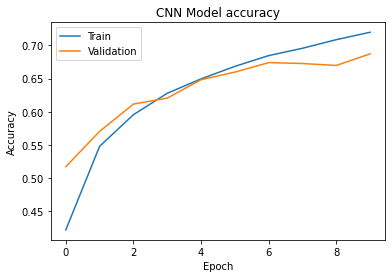

In [16]:
# Evaluate the model
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

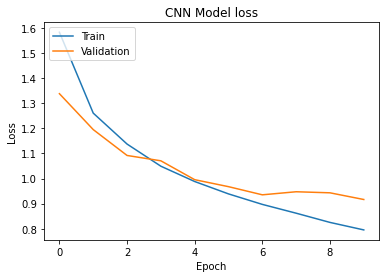

In [17]:
# Plot training & validation Loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(X_test, y_test, batch_size=batch_size)

history_gen = cnn.fit(train_generator, steps_per_epoch=len(X_train)//batch_size,epochs=10,
                     validation_data=test_generator,validation_steps=len(X_test)//batch_size)

Epoch 1/10
1562/1562 [==============================] - 38s 24ms/step - loss: 1.0198 - accuracy: 0.6419 - val_loss: 1.0823 - val_accuracy: 0.6158
Epoch 2/10
1562/1562 [==============================] - 39s 25ms/step - loss: 0.9938 - accuracy: 0.6482 - val_loss: 1.0084 - val_accuracy: 0.6443
Epoch 3/10
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9691 - accuracy: 0.6568 - val_loss: 1.0888 - val_accuracy: 0.6240
Epoch 4/10
1562/1562 [==============================] - 42s 27ms/step - loss: 0.9519 - accuracy: 0.6637 - val_loss: 0.9626 - val_accuracy: 0.6583
Epoch 5/10
1562/1562 [==============================] - 42s 27ms/step - loss: 0.9363 - accuracy: 0.6709 - val_loss: 1.0649 - val_accuracy: 0.6261
Epoch 6/10
1562/1562 [==============================] - 42s 27ms/step - loss: 0.9309 - accuracy: 0.6708 - val_loss: 0.9691 - val_accuracy: 0.6598
Epoch 7/10
1562/1562 [==============================] - 44s 28ms/step - loss: 0.9087 - accuracy: 0.6802 - val_loss: 0.9456 -

In [27]:
history_cnn = cnn.fit(train_generator, steps_per_epoch=len(X_train)//batch_size,epochs=10,
                     validation_data=test_generator,validation_steps=len(X_test)//batch_size)

Epoch 1/10
1562/1562 [==============================] - 37s 24ms/step - loss: 0.8722 - accuracy: 0.6949 - val_loss: 0.9182 - val_accuracy: 0.6815
Epoch 2/10
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8696 - accuracy: 0.6957 - val_loss: 0.8705 - val_accuracy: 0.6904
Epoch 3/10
1562/1562 [==============================] - 48s 31ms/step - loss: 0.8590 - accuracy: 0.7001 - val_loss: 0.8677 - val_accuracy: 0.6982
Epoch 4/10
1562/1562 [==============================] - 42s 27ms/step - loss: 0.8443 - accuracy: 0.7045 - val_loss: 0.8602 - val_accuracy: 0.7029
Epoch 5/10
1562/1562 [==============================] - 42s 27ms/step - loss: 0.8407 - accuracy: 0.7069 - val_loss: 0.8828 - val_accuracy: 0.6930
Epoch 6/10
1562/1562 [==============================] - 41s 27ms/step - loss: 0.8361 - accuracy: 0.7075 - val_loss: 0.8870 - val_accuracy: 0.6944
Epoch 7/10
1562/1562 [==============================] - 44s 28ms/step - loss: 0.8351 - accuracy: 0.7096 - val_loss: 0.8458 -

In [28]:
history_cnn.history

{'loss': [0.8722352385520935,
  0.8696213960647583,
  0.8589755892753601,
  0.8442867398262024,
  0.8406784534454346,
  0.8361497521400452,
  0.8350697755813599,
  0.8300426602363586,
  0.8124383091926575,
  0.8141874074935913],
 'accuracy': [0.694884717464447,
  0.6957252621650696,
  0.7000880837440491,
  0.7044708728790283,
  0.7069324254989624,
  0.7075328230857849,
  0.7095741033554077,
  0.7100744247436523,
  0.7140769958496094,
  0.7152978181838989],
 'val_loss': [0.9181681871414185,
  0.870499849319458,
  0.867668628692627,
  0.860244870185852,
  0.8827540278434753,
  0.8869592547416687,
  0.8457674980163574,
  0.8795680403709412,
  0.8453637957572937,
  0.8496934175491333],
 'val_accuracy': [0.6814903616905212,
  0.6904046535491943,
  0.6982171535491943,
  0.7029246687889099,
  0.6930088400840759,
  0.694411039352417,
  0.6989182829856873,
  0.6949118375778198,
  0.7062299847602844,
  0.7086338400840759]}

In [24]:
cnn.evaluate(test_generator)

313/313 [==============================] - 4s 14ms/step - loss: 0.9380 - accuracy: 0.6745


[0.9379933476448059, 0.6744999885559082]

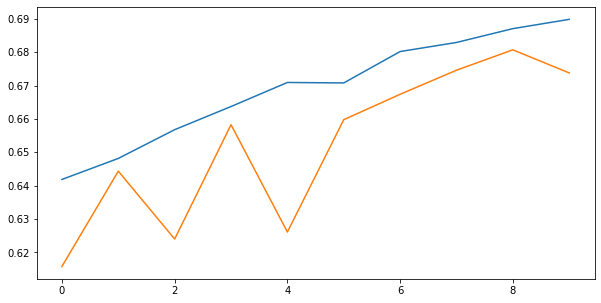

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history_gen.history['accuracy'])
plt.plot(history_gen.history['val_accuracy'])

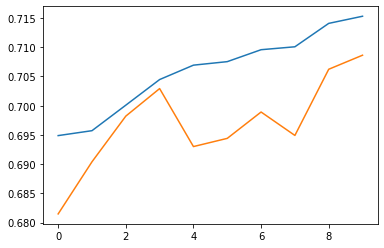

In [30]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

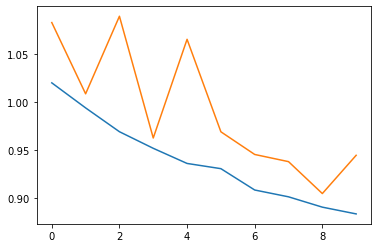

In [32]:
plt.plot(history_gen.history['loss'])
plt.plot(history_gen.history['val_loss'])